In [21]:
from __future__ import print_function 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [80]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 2

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [76]:
original_label

array([0, 0, 0, ..., 2, 2, 2])

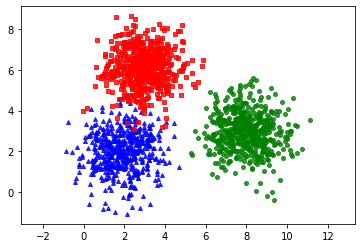

In [77]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [57]:
# random_number = random.sample(range(X.shape[0]), K)
# centroids = X[random_number]
# centroids

array([[2.02994773, 2.42367147],
       [7.92643967, 2.51433159]])

In [58]:
X.shape

(1500, 2)

In [59]:
centroids.shape

(2, 2)

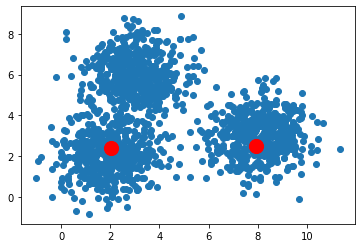

In [60]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c= 'red', s= 200)

In [61]:
# centroid[:,np.newaxis] - (4,) => (4,1) column vector

def closest_centroid(x, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((x - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [62]:
l = closest_centroid(X, centroids)
l

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
l.shape

(1500,)

In [64]:
centroids.shape

(2, 2)

In [65]:
X.shape

(1500, 2)

In [66]:
X- centroids[:,np.newaxis]

array([[[-2.8447748 , -0.45777266],
        [ 0.2589933 , -0.63539115],
        [-1.86964693, -0.60573201],
        ...,
        [ 0.85612973,  2.36343452],
        [ 2.15235654,  1.60696918],
        [ 1.38628155,  3.23875697]],

       [[-8.74126674, -0.54843277],
        [-5.63749864, -0.72605127],
        [-7.76613887, -0.69639212],
        ...,
        [-5.0403622 ,  2.27277441],
        [-3.7441354 ,  1.51630906],
        [-4.51021039,  3.14809686]]])

In [67]:
def update_centroids(X, labels, centroids):
  centroids = np.zeros((K, X.shape[1]))
  for i in range(K):
    new_centroid = X[labels == i, :]
    centroids[i, :] = np.mean(new_centroid, axis = 0)
  return centroids
  # return np.array([X[lables==i].mean()] for i in range(K))

In [68]:
update_centroids(X, closest_centroid(X, centroids), centroids)

array([[2.43556669, 3.97479067],
       [7.9103728 , 3.13867996]])

In [69]:
centroids

array([[2.02994773, 2.42367147],
       [7.92643967, 2.51433159]])

In [70]:
def check_stop(centroid, new_cenntroid):
  if np.array_equal(centroid, new_cenntroid):
    return True
  return False

In [71]:
while True:
  closest = closest_centroid(X, centroids)
  if check_stop(centroids, update_centroids(X, closest, centroids)):
    break
  else:
    centroids = update_centroids(X, closest, centroids)

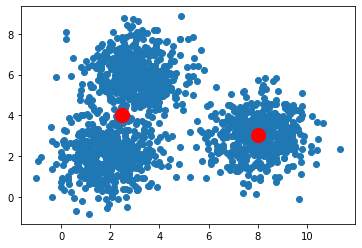

In [72]:
# K = 2
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c='red', s= 200)

In [73]:
def kmeans(data, num_clus):
  random_number = random.sample(range(data.shape[0]), num_clus)
  centroids = data[random_number]
  while True:
    closest = closest_centroid(data, centroids)
    if check_stop(centroids, update_centroids(data, closest, centroids)):
      break
    else:
      centroids = update_centroids(data, closest, centroids)
  plt.scatter(X[:,0], X[:,1])
  plt.scatter(centroids[:,0], centroids[:,1], c='red', s= 200)
  return (centroids, closest)

(array([[1.9780868 , 2.0065323 ],
        [2.98431534, 6.03500824],
        [8.03643517, 3.02468432]]), array([0, 0, 0, ..., 1, 1, 1]))

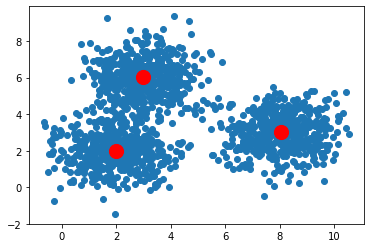

In [52]:
# K = 3
kmeans(X, 3)

(array([[1.8995746 , 1.99802877],
        [7.24337717, 3.24949304],
        [2.9570027 , 6.11019549],
        [8.83333336, 2.62930247]]), array([0, 0, 0, ..., 2, 2, 2]))

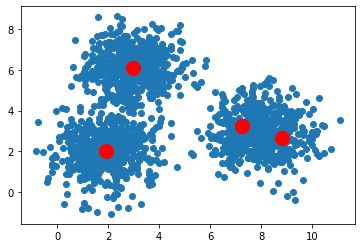

In [78]:
kmeans(X, 4)

(array([[2.51644152, 4.00171564],
        [8.02265327, 2.99058919]]), array([0, 0, 0, ..., 0, 0, 0]))

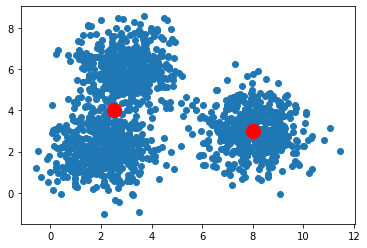

In [81]:
kmeans(X,2)